**Predicting Breast Cancer in Patients using Ensemble Techniques and Optimized Support Vector Classifier**

**Problem Statement :**
Given the details of cell nuclei taken from breast mass, predict whether or not a patient has breast cancer using the Ensembling Techniques. Perform necessary exploratory data analysis before building the model and evaluate the model based on performance metrics other than model accuracy

**Importing the packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

**Loading the dataset**

In [ ]:
dataset = pd.read_csv("cancer.csv")
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
#Number of Rows and Columns in the dataset
dataset.shape

(569, 33)

In [ ]:
#Information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Droping the unwanted columns

In [ ]:
dataset.drop(['id'], axis = 1, inplace = True )

In [ ]:
dataset.drop(['Unnamed: 32'], axis = 1, inplace = True)
dataset.shape

(569, 31)

In [ ]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
dataset['diagnosis'].unique()

array(['M', 'B'], dtype=object)

Replacing B --> 0 and
          M --> 1

In [ ]:
dataset['diagnosis'].replace({'B': 0, 'M': 1 }, inplace = True)
dataset.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


**Explorative Data Analysis (EDA)**

In [ ]:
# Statistican measures abount the dataset
dataset.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
dataset['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

<Axes: >

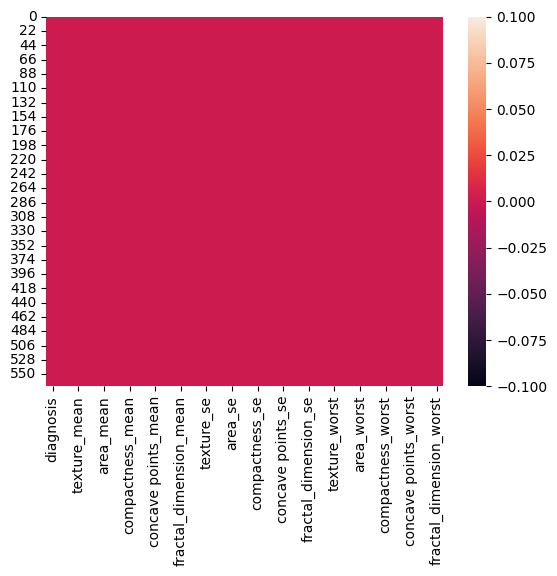

In [ ]:
sns.heatmap(dataset.isnull())

<Axes: xlabel='diagnosis', ylabel='count'>

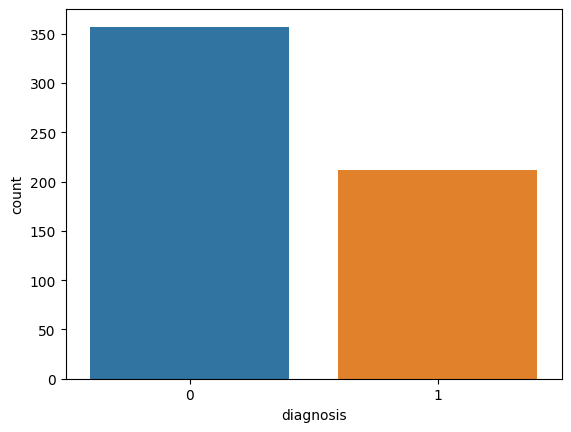

In [ ]:
sns.countplot(x= "diagnosis", data = dataset)

array([[<Axes: title={'center': 'diagnosis'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'cent

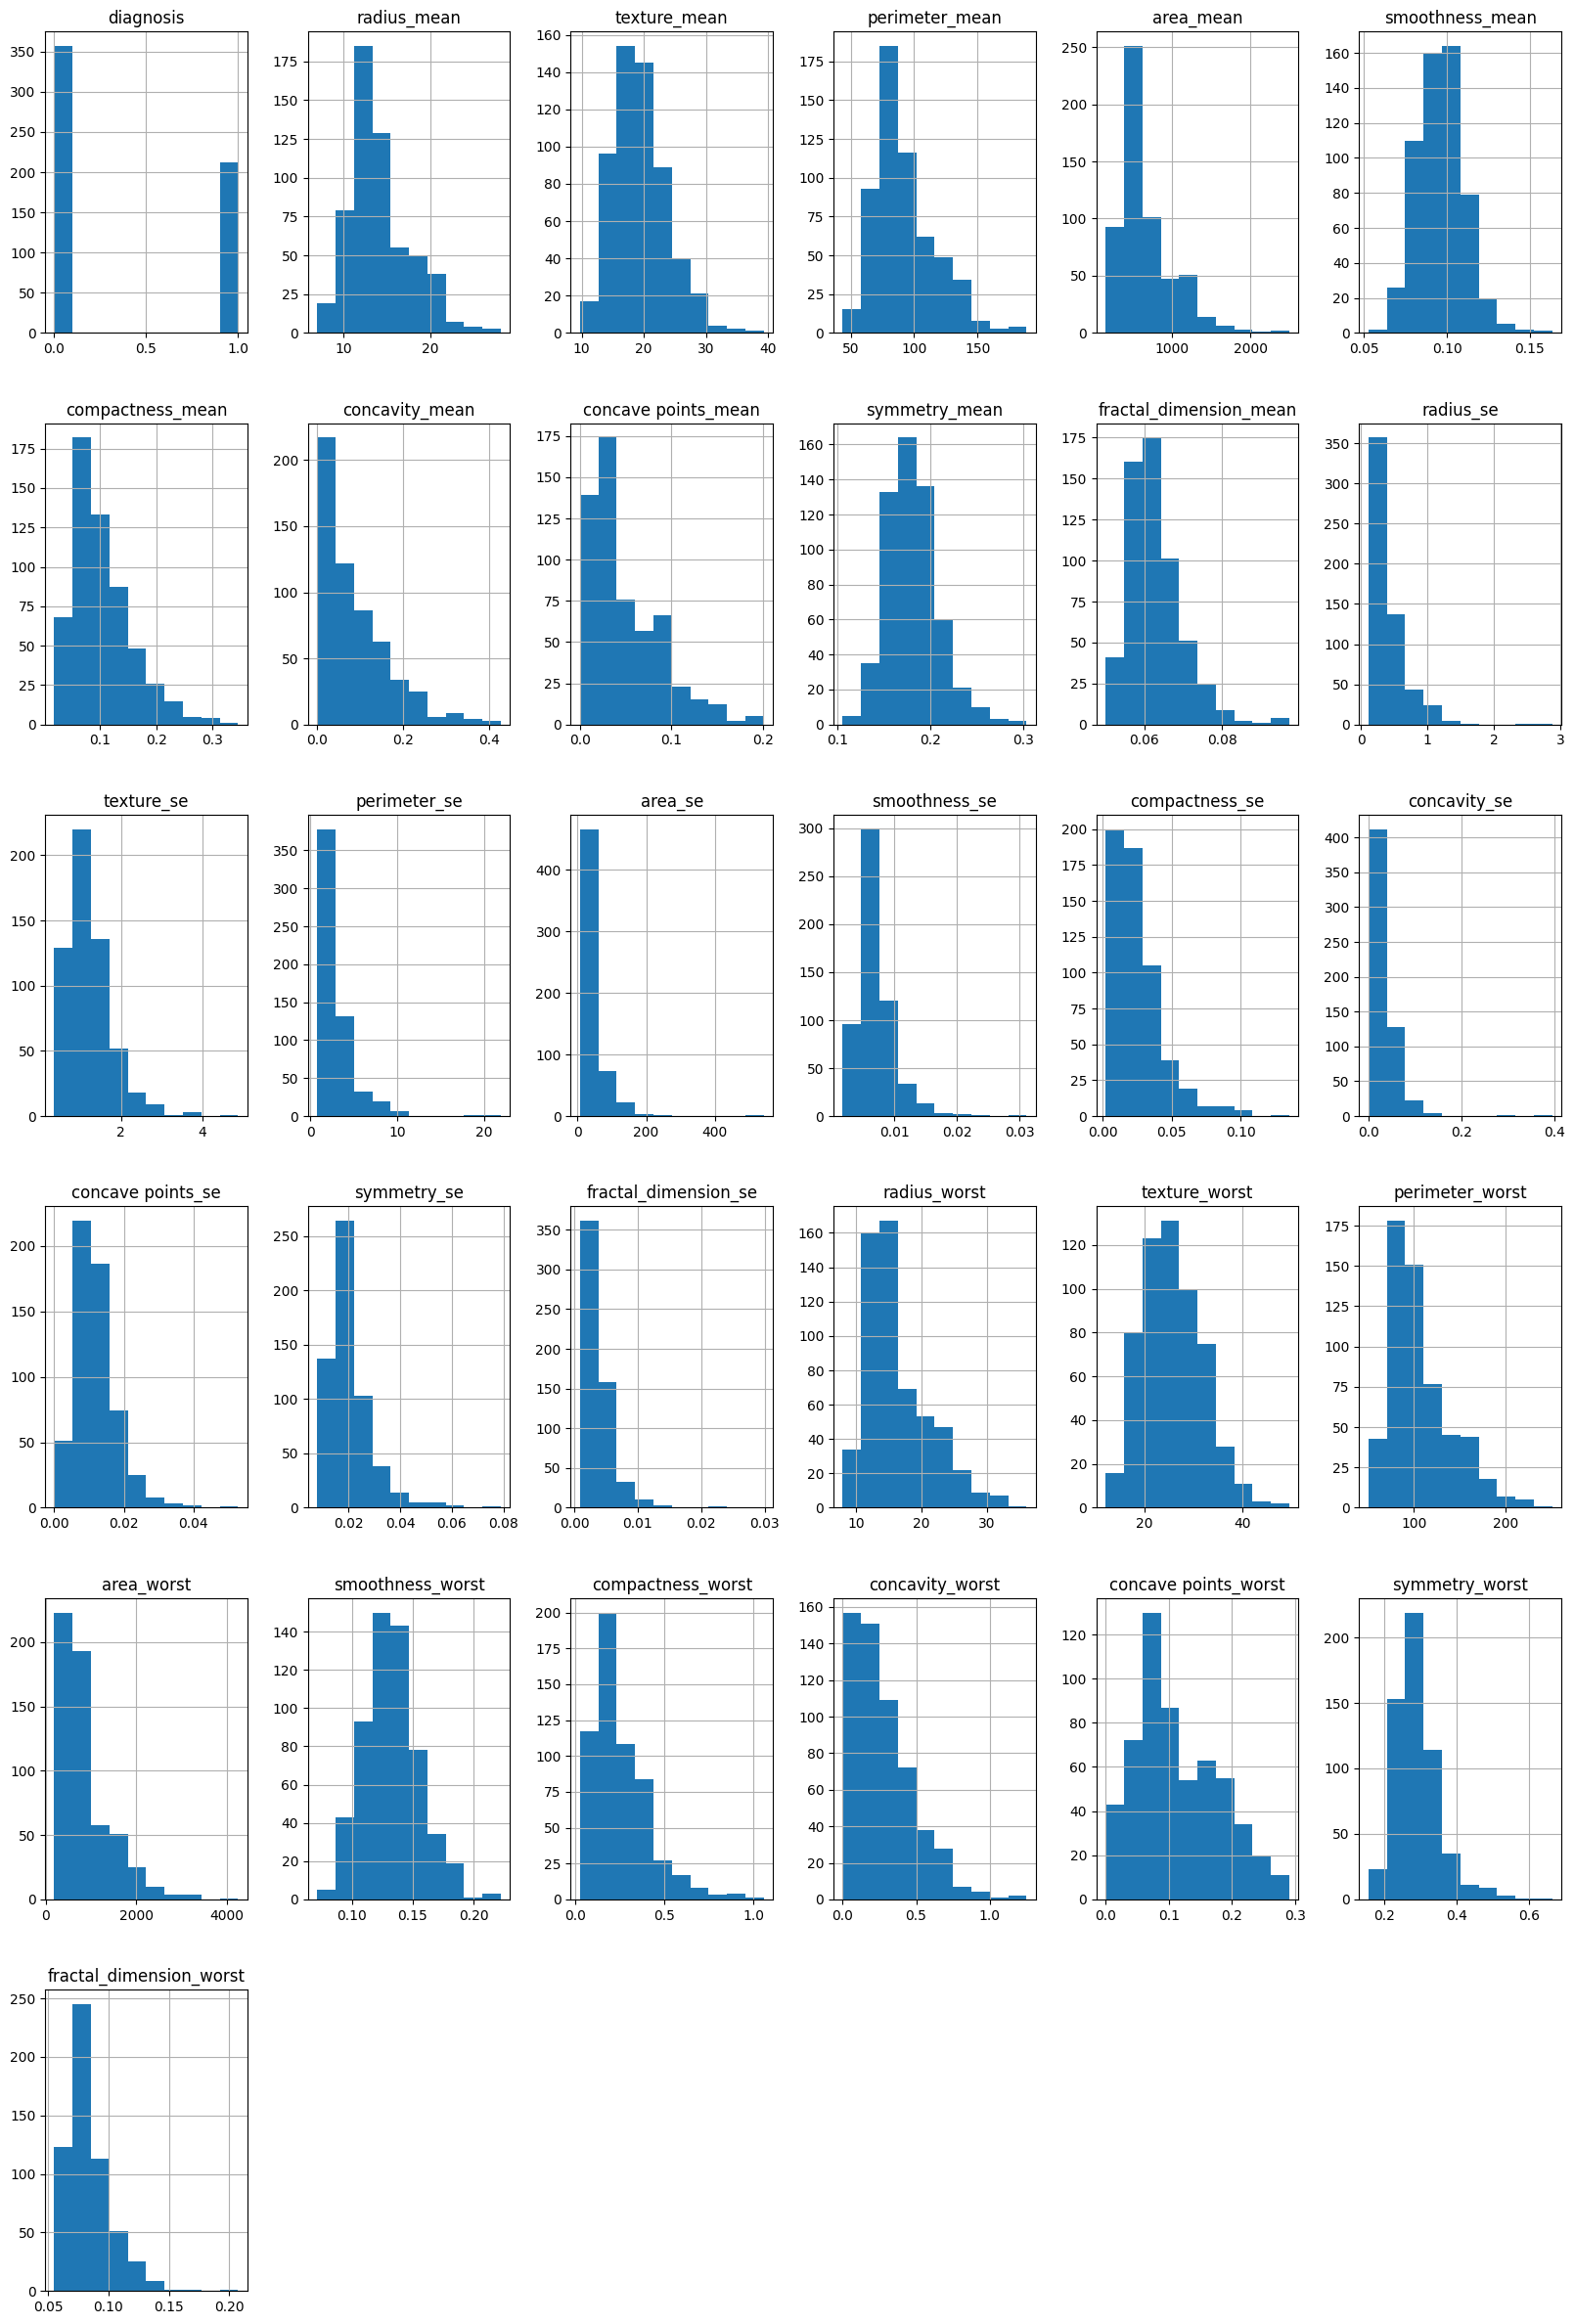

In [ ]:
dataset.hist(figsize=(20,30))

In [ ]:
#Lets see the correlation
correlation = dataset.corr()
correlation

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


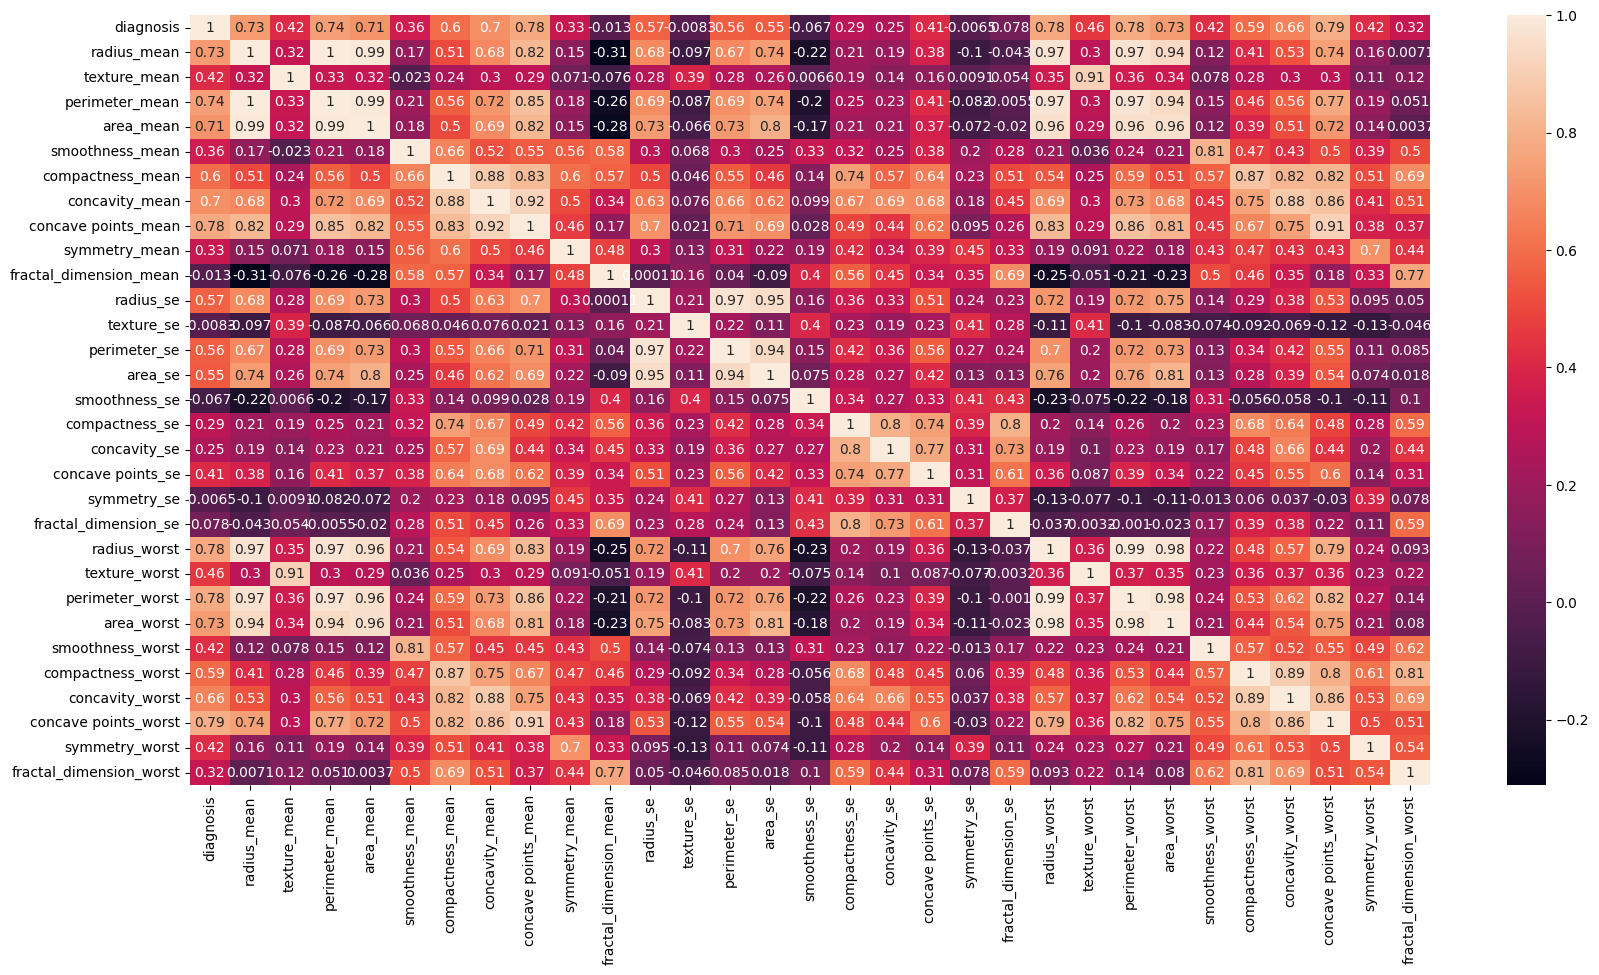

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation,annot=True)
plt.show()

In [ ]:
pip install dataprep

**This module will give us a report on dataset**

In [ ]:
from dataprep.eda import create_report

In [ ]:
Report = create_report(dataset)
Report

**Separating the features and targets**

In [ ]:
x = dataset.drop('diagnosis', axis =1)
y = dataset['diagnosis']

**Splitting the training data and testing**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Model building
    --> SVM classifier
    --> LogisticRegression
    --> Randomforest classifier
    --> DecisionTree Classifier
    --> GradientBoosting Classifier

**SVM classifier**

In [ ]:
model_1 = SVC()
model_1.fit(x_train, y_train)

SVC()

In [ ]:
#Accuracy on test data
x_test_pred_1 = model_1.predict(x_test)
testing_data_accuracy = accuracy_score(y_test,x_test_pred_1)
print("The accuracy score of SVC model is : ", testing_data_accuracy)

The accuracy score of SVC model is :  0.9473684210526315


In [ ]:
#Confusion matrix
cm_model_1 = confusion_matrix(y_test,x_test_pred_1)
df_1 = pd.DataFrame(cm_model_1)
print("Confusion matrix of SVC")
print(df_1)

Confusion matrix of SVC
    0   1
0  71   0
1   6  37


**Logistic Regression**

In [ ]:
model_2 = LogisticRegression()
model_2.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Accuracy score on test data
x_test_pred_2 = model_2.predict(x_test)
testing_data2_accuracy = accuracy_score(y_test, x_test_pred_2)
print("The accuracy score of Logistic regression model is : ", testing_data2_accuracy)

The accuracy score of Logistic regression model is :  0.9649122807017544


In [ ]:
#Confusion matrix
cm_model_2 = confusion_matrix(y_test,x_test_pred_2)
df_2 = pd.DataFrame(cm_model_2)
print("Confusion matrix of \nLogistic regression")
print(df_2)

Confusion matrix of 
Logistic regression
    0   1
0  70   1
1   3  40


**Random Forest Classifier**

In [ ]:
model_3 = RandomForestClassifier()
model_3.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
#Accuracy on testing data
x_test_pred_3 = model_3.predict(x_test)
testing_data_3_accuracy = accuracy_score(y_test, x_test_pred_3)
print("The accuracy score of Random forest classifier is : ", testing_data_3_accuracy)

The accuracy score of Random forest classifier is :  0.9649122807017544


In [ ]:
#Confusion matrix
cm_model_3 = confusion_matrix(y_test,x_test_pred_3)
df_3 = pd.DataFrame(cm_model_3)
print("Confusion matrix of \nRandom forest classifier")
print(df_3)

Confusion matrix of 
Random forest classifier
    0   1
0  70   1
1   3  40


**DecitionTree classifier**

In [ ]:
model_4 = DecisionTreeClassifier()
model_4.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
#Accuracy on test data
x_test_pred_4 = model_4.predict(x_test)
testing_data_4_accuracy = accuracy_score(y_test,x_test_pred_4)
print("The accuracy of DecisionTree Classifier is : ", testing_data_4_accuracy)

The accuracy of DecisionTree Classifier is :  0.9473684210526315


In [ ]:
#Confusion matrix
cm_model_4 = confusion_matrix(y_test,x_test_pred_4)
df_4 = pd.DataFrame(cm_model_4)
print("Confusion matrix of \nDecisionTree classifier")
print(df_4)

Confusion matrix of 
DecisionTree classifier
    0   1
0  68   3
1   3  40


**GradientBoosting Classifier**

In [ ]:
model_5 = GradientBoostingClassifier(learning_rate=0.1)
model_5.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
#Accuracy on test data
x_test_pred_5 = model_5.predict(x_test)
testing_data_5_accuracy = accuracy_score(y_test,x_test_pred_5)
print("The accuracy of GradientBoosting Classifier is : ", testing_data_5_accuracy)

The accuracy of GradientBoosting Classifier is :  0.956140350877193


In [ ]:
#Confusion matrix
cm_model_5 = confusion_matrix(y_test,x_test_pred_5)
df_5 = pd.DataFrame(cm_model_5)
print("Confusion matrix of \nGradientBoosting classifier")
print(df_5)

Confusion matrix of 
GradientBoosting classifier
    0   1
0  69   2
1   3  40


**Comparing the models**

In [ ]:
model_list = ["SVC", "Logistic Regression", "Random Forest", "Decition Tree", "GradientBoosting"]
models_accuracy = [testing_data_accuracy, testing_data2_accuracy, testing_data_3_accuracy, testing_data_4_accuracy, testing_data_5_accuracy]

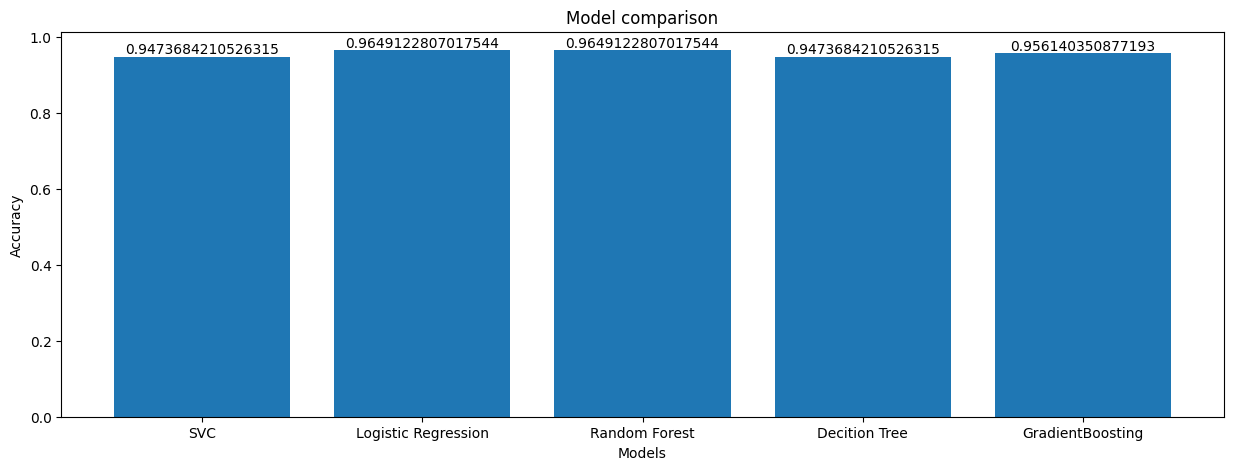

In [ ]:
plt.figure(figsize=(15, 5))
plt.title("Model comparison")
plt.bar(model_list, models_accuracy)
plt.xlabel("Models")
plt.ylabel("Accuracy")
for i in range(len(model_list)):
    plt.text(model_list[i], models_accuracy[i], str(models_accuracy[i]), ha='center', va='bottom')
plt.show()

# Hyperparameter tuning

In [ ]:
ss = StandardScaler()
x_ss = ss.fit_transform(x)
x_train_ss, x_test_ss, y_train_ss, y_test_ss = train_test_split(x_ss,y,test_size=0.2, random_state=42)

**Performing GridSearchCV to Find the optimal hyperparameters**

In [ ]:
param_grid_svc = {
    'C' : [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0],
'kernel':['linear', 'rbf', 'sigmoid'],
'gamma' : ['scale','auto'],
'coef0' : [1.0,1.5,2.0,2.5,3.0,3.5,4.0],
'tol' : [1e-3,2e-3,3e-3,4e-3,5e-3]
}

Tuned_model_SVC = GridSearchCV(estimator=SVC(), param_grid=param_grid_svc, cv=5, n_jobs=-1,)
Tuned_model_SVC.fit(x_train_ss, y_train_ss)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5,
                               5.0],
                         'coef0': [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid'],
                         'tol': [0.001, 0.002, 0.003, 0.004, 0.005]})

In [ ]:
print("Best Parameters: ", Tuned_model_SVC.best_params_)
print("Best Score: ", Tuned_model_SVC.best_score_)

Best Parameters:  {'C': 3.0, 'coef0': 1.0, 'gamma': 'auto', 'kernel': 'rbf', 'tol': 0.001}
Best Score:  0.9780219780219781


In [ ]:
#Building a tuned model

model_SVC_tuned = SVC(C= 3.0, coef0 = 1.0, gamma= 'auto', kernel = 'rbf', tol = 0.001)
model_SVC_tuned.fit(x_train_ss, y_train_ss)

SVC(C=3.0, coef0=1.0, gamma='auto')

In [ ]:
#Accuracy on test data
x_test_prediction = model_SVC_tuned.predict(x_test_ss)
testing_accuracy = accuracy_score(y_test_ss,x_test_prediction)
print("The accuracy score of tuned SVC model is : ", testing_accuracy)

The accuracy score of tuned SVC model is :  0.9824561403508771


In [ ]:
print(classification_report(y_test_ss,x_test_prediction))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
#Confusion matrix
cm_model_SVC_tuned = confusion_matrix(y_test_ss,x_test_prediction)
df_SVC_tuned = pd.DataFrame(cm_model_SVC_tuned)
print("Confusion matrix of \nTuned SVC model")
print(df_SVC_tuned)

Confusion matrix of 
Tuned SVC model
    0   1
0  71   0
1   2  41


In [ ]:
model_list.append("Tuned SVC model")
models_accuracy.append(testing_accuracy)

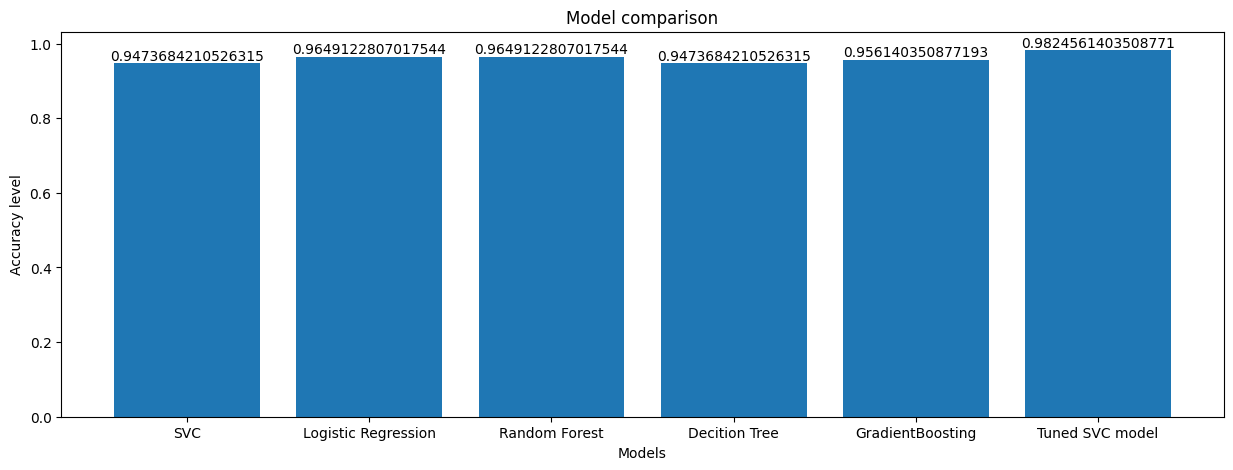

In [ ]:
plt.figure(figsize=(15, 5))
plt.title("Model comparison")
plt.bar(model_list, models_accuracy)
plt.xlabel("Models")
plt.ylabel("Accuracy level")
for i in range(len(model_list)):
    plt.text(model_list[i], models_accuracy[i], str(models_accuracy[i]), ha='center', va='bottom')
plt.show()

**Pickling the tuned model for furthur web deployment**

In [165]:
import pickle

In [170]:
file = open("Breast_cancer_model.jpg", "wb")
pickle.dump(model_SVC_tuned, file)
file.close()

In [171]:
file_2 = open("Breast_cancer_report.jpg", "wb")
pickle.dump(Report, file_2)
file_2.close()

**Conclusion :** Through this report, we can see that the optimized Support Vector Classifier (SVC) is giving higher accuracy than other ensemble models, including Logistic Regression, Random Forest, DecisionTree and GradientBoosting algorithms.